## Installs and Imports

In [1]:

%pip install autoray
%pip install opt_einsum

!pip install --no-deps -U git+https://github.com/jcmgray/quimb.git@08ab4805df6be023e1027503b8c0915e1bf50b34
%pip install -U git+https://github.com/jcmgray/cotengra.git
!pip install kahypar

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jcmgray/quimb.git (to revision 08ab4805df6be023e1027503b8c0915e1bf50b34) to /tmp/pip-req-build-rk6_6yb2
  Running command git clone --filter=blob:none --quiet https://github.com/jcmgray/quimb.git /tmp/pip-req-build-rk6_6yb2
  fatal: the remote end hung up unexpectedly
  You can inspect what was checked out with 'git status'
  and retry with 'git restore --source=HEAD :/'

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/jcmgray/quimb.git /tmp/pip-req-build-rk6_6yb2 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/jcmgray/quimb.git /tmp/pip-req-build-rk6_6yb2 did not run s

In [2]:
# just set up some misc notebook plotting stuff

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
import sys; sys.path.append('..')
import matplotlib.pyplot as plt
import quimb.tensor as qtn
import cotengra as ctg
import quimb as qu
import numpy as np
import time, random

In [4]:
import pyzx as zx
import importlib
importlib.reload(zx)

<module 'pyzx' from '/home/snehal/pyzx/pyzx/__init__.py'>

# Main

In [5]:
zx.settings.drawing_backend = 'd3'
def show(g):
  return zx.draw_matplotlib(g,labels=True,h_edge_draw='box')
def show_d3(g):
  return zx.draw_d3(g)

In [6]:
circ = zx.Circuit.from_qsim_file('circuits/d.qsim')

In [7]:
g = circ.to_graph(zh=True)

In [8]:
qubits = 4
g.apply_state("0" * qubits)  # use kets 0 as inputs
g.apply_effect("0" *qubits)

In [9]:
tn1 = zx.to_quimb_tensor(g).contract(output_inds=())
abs(tn1)

0.23375326533059965

In [10]:
# from pyzx.simplify import to_gh
# from pyzx.hsimplify import from_hypergraph_form
# to_gh(g)
# from_hypergraph_form(g)
# show_d3(g)

In [11]:
show_d3(g)

In [12]:
zx.to_quimb_tensor(g).contract(output_inds=())

(-0.21676462048443765+0.0874853608265716j)

In [13]:
abs(g.to_tensor())

0.23375326533060292

In [14]:
zx.full_reduce(g, quiet=False)
show_d3(g)

spider_simp: 15. 6. 3.  3 iterations
id_simp: 6.  1 iterations
spider_simp: 2. 2.  2 iterations
lcomp_simp: 19. 3.  2 iterations
pivot_gadget_simp: 5. 2. 1.  3 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
gadget_simp: 3.  1 iterations


In [15]:
h= g.copy()

In [2]:
from pyzx.hsimplify import zh_simp, new_simp
zh_simp(g)
show_d3(g)

NameError: name 'g' is not defined

In [1]:
for v in g.vertices():
        if g.type(v) == VertexType.H_BOX and g.phase(v) != 0:
            print(g.neighbors(v))

NameError: name 'g' is not defined

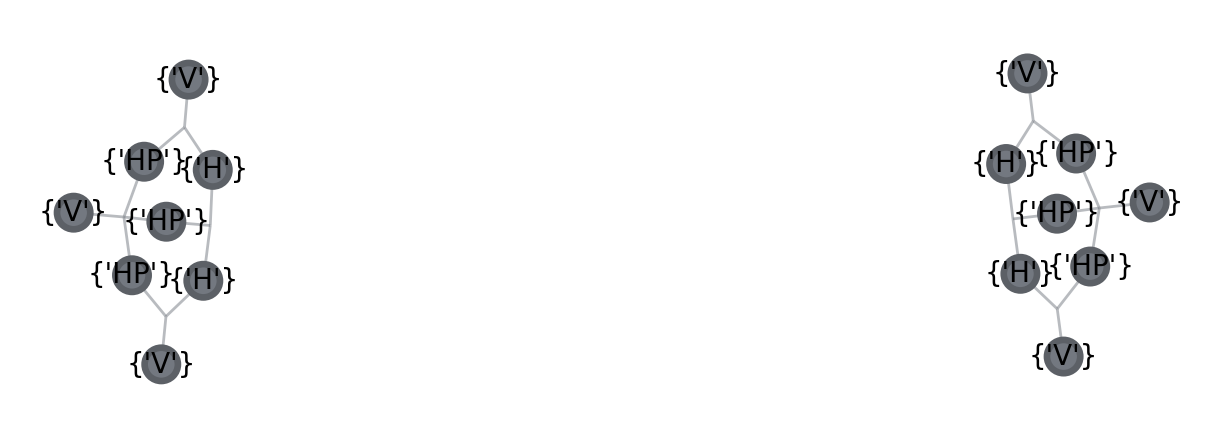

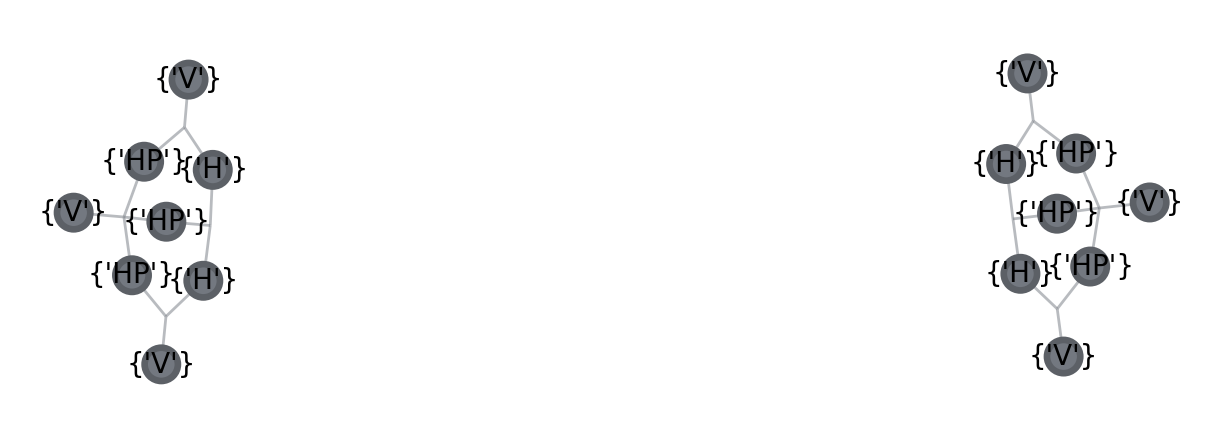

In [17]:
zx.to_quimb_tensor(g).graph(show_tags=True, return_fig=True)

In [18]:
abs(zx.to_quimb_tensor(g).contract(output_inds=()))

0.23375326533060128

In [19]:
abs(g.to_tensor())

0.23375326533060137

In [86]:
from pyzx.hsimplify import from_hypergraph_form, to_gh, to_hypergraph_form, hsimp, par_hbox_simp
from pyzx.hrules import match_hpivot, hpivot 
to_gh(g)
from_hypergraph_form(g)
to_hypergraph_form(g)
hsimp(g, 'hpivot', match_hpivot, hpivot, iterations=1, quiet=False)
i = g.copy()

hpivot: 1.  1 iterations


In [87]:
show_d3(i)

In [88]:
test= i.copy()
from_hypergraph_form(test)
for v in test.vertices():
    print(test.type(v))
    if test.type(v) == 3:
        x,y = test.neighbors(v)
        print(test.neighbors(v))
        print(x,y)
        print(test.phase(v))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
dict_keys([1, 6])
1 6
3284235024194209/4503599627370496


In [89]:
zx.draw_d3(test, labels=True)

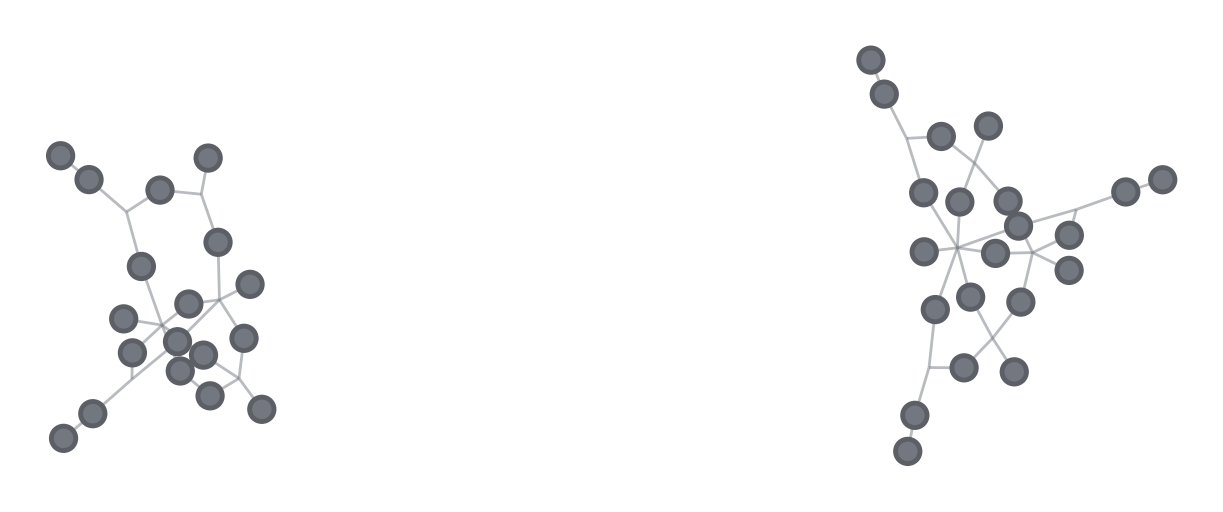

In [92]:
from_hypergraph_form(i)
show_d3(i)
zx.to_quimb_tensor(i).graph()

In [93]:
abs(zx.to_quimb_tensor(i).contract(output_inds=()))

0.1569368012151968

In [94]:
par_hbox_simp(g,quiet=False)
j = g.copy()

par_hbox_simp: 2.  1 iterations


In [71]:
t1 = zx.to_quimb_tensor(g).contract(output_inds=())
t2 = zx.to_quimb_tensor(h).contract(output_inds=())
t3 = zx.to_quimb_tensor(i).contract(output_inds=())
t4 = zx.to_quimb_tensor(j).contract(output_inds=())
print(f"t1 = {t1} abs(t1) = {abs(t1)}")
print(f"t2 = {t2} abs(t2) = {abs(t2)}")
print(f"t3 = {t3} abs(t3) = {abs(t3)}")
print(f"t4 = {t4} abs(t4) = {abs(t4)}")

ValueError: not enough values to unpack (expected 2, got 1)

In [72]:
t1 = g.to_tensor()
t2 = h.to_tensor()
t3 = i.to_tensor()
t4 = j.to_tensor()
print(f"t1 = {t1} abs(t1) = {abs(t1)}")
print(f"t2 = {t2} abs(t2) = {abs(t2)}")
print(f"t3 = {t3} abs(t3) = {abs(t3)}")
print(f"t4 = {t4} abs(t4) = {abs(t4)}")

t1 = (-0.21676462048443917+0.08748536082657214j) abs(t1) = 0.23375326533060126
t2 = (-0.216764620484439+0.08748536082657202j) abs(t2) = 0.23375326533060106
t3 = (-0.21676462048443915+0.08748536082657202j) abs(t3) = 0.23375326533060117
t4 = (-0.21676462048443917+0.08748536082657214j) abs(t4) = 0.23375326533060126


In [31]:
h.scalar.is_zero

False

In [25]:
abs(h.to_tensor() - zx.to_quimb_tensor(h).contract(output_inds=()))

7.899375304297577e-16

In [26]:
abs(g.to_tensor() - zx.to_quimb_tensor(g).contract(output_inds=()))

0.23180015637458226

In [22]:
i.to_tensor()

array(-0.21676462+0.08748536j)

In [23]:
j.to_tensor()

array(-0.21676462+0.08748536j)

In [37]:
abs(zx.to_quimb_tensor(g).contract(output_inds=()))

2.1286304241596137e-06

In [ ]:
abs()

In [11]:
from pyzx.hsimplify import new_simp
new_simp(g,quiet=False)

spider_simp: 7. 4. 1. 1.  4 iterations
id_simp: 2.  1 iterations
spider_simp: 2.  1 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
copy_simp: 2.  1 iterations
spider_simp: 3.  1 iterations
lcomp_simp: 4.  1 iterations


5

In [12]:
show_d3(g)

In [13]:
h = g.copy()

In [14]:
from pyzx.hsimplify import from_hypergraph_form, to_gh, to_hypergraph_form, hsimp, par_hbox_simp
from pyzx.hrules import match_hpivot, hpivot 
to_gh(g)
from_hypergraph_form(g)
to_hypergraph_form(g)
show_d3(g)


In [15]:
hsimp(g, 'hpivot', match_hpivot, hpivot, iterations=1, quiet=False)
show_d3(g)

hpivot: 1.  1 iterations


In [16]:
zx.compare_tensors(h,g)

True

In [17]:
a = zx.to_quimb_tensor(g).contract(output_inds=())
b = zx.to_quimb_tensor(h).contract(output_inds=())
a==b

False

In [19]:
print(a)
print(abs(b) )

(1.0000000000000002+0j)
0.9999999999999994


In [27]:
tn2 = zx.to_quimb_tensor(g).contract(output_inds=())
tn2

(1.0000000000000002+0j)

In [16]:
abs(tn1) - abs(tn2)

-6.661338147750939e-16

In [27]:
show_d3(g)

In [64]:
quimb_tn = zx.to_quimb_tensor(g)
quimb_tn.astype_('complex64')

<TensorNetwork(tensors=111, indices=62)>

In [65]:
quimb_tn.contract(output_inds=())

(3.1159363e-13-5.7327867e-15j)

In [22]:
quimb_tn.full_simplify_('LRSAD',output_inds=())
quimb_tn.astype_('complex64')

<TensorNetwork(tensors=1, indices=0)>

In [23]:
quimb_tn.contract()

(-6.6804094e-24+1.6382564e-25j)

In [32]:
opt2 = ctg.HyperOptimizer(
    methods=['kahypar', 'greedy'],
    max_repeats=128,
    progbar=True,
    minimize='flops',
    score_compression=0.5,  # deliberately make the optimizer try many methods 
)

In [33]:
info = quimb_tn.contract(all, optimize=opt2,output_inds=(), get='path-info')

log2[SIZE]: 14.00 log10[FLOPs]: 6.14: 100%|██████████| 128/128 [00:21<00:00,  6.01it/s]


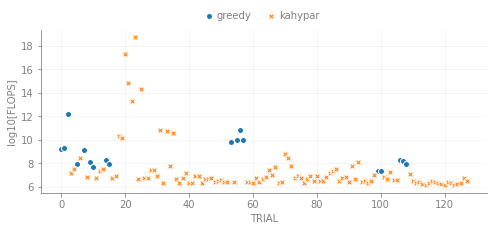

In [34]:
opt2.plot_trials(y='flops')

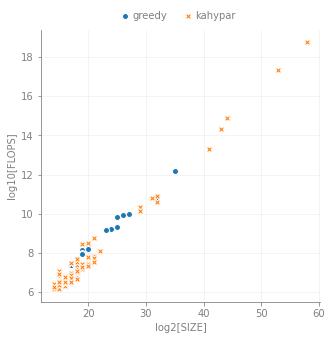

In [35]:
opt2.plot_scatter()

In [36]:
tree = opt2.get_tree()
f'{tree.contraction_cost():e}'

'6.867160e+05'

In [31]:
f'{tree.contraction_width():e}'

'1.500000e+01'

In [2]:
g1.to_quimb_tensor()

NameError: name 'g1' is not defined